<h3>Part 1</h3>

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './factory_test_data.csv'
df = pd.read_csv(path)
df.replace('[]', pd.NA, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['X2'] = pd.to_numeric(df['X2'])
df['Y2'] = pd.to_numeric(df['Y2'])
df['X3'] = pd.to_numeric(df['X3'])
df['Y3'] = pd.to_numeric(df['Y3'])
df['X4'] = pd.to_numeric(df['X4'])
df['Y4'] = pd.to_numeric(df['Y4'])
df['X5'] = pd.to_numeric(df['X5'])
df['Y5'] = pd.to_numeric(df['Y5'])


print("Data Description:")
print(df.info())
print(df.describe())
print(df.head())

Data Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      47 non-null     int64  
 1   X2      47 non-null     int64  
 2   Y2      47 non-null     float64
 3   X3      47 non-null     int64  
 4   Y3      47 non-null     float64
 5   X4      47 non-null     int64  
 6   Y4      47 non-null     float64
 7   X5      47 non-null     int64  
 8   Y5      47 non-null     float64
dtypes: float64(4), int64(5)
memory usage: 3.4 KB
None
                Y1    X2         Y2    X3         Y3    X4         Y4    X5  \
count    47.000000  47.0  47.000000  47.0  47.000000  47.0  47.000000  47.0   
mean   1505.957447  18.0  17.425957  14.0  13.452340  12.0  11.673830   9.0   
std      74.335011   0.0   4.275727   0.0   0.123732   0.0   1.226748   0.0   
min    1487.000000  18.0   7.870000  14.0  13.190000  12.0   9.100000   9.0   
25%    1493.000000  18.

The CSV file has some empty lines, which means some devices don't have any data, so I deleted the empty lines. After that, I converted all the data to numbers to perform calculations on the data. And then, I printed some info and a description of the data.

<h3>Part 2</h3>

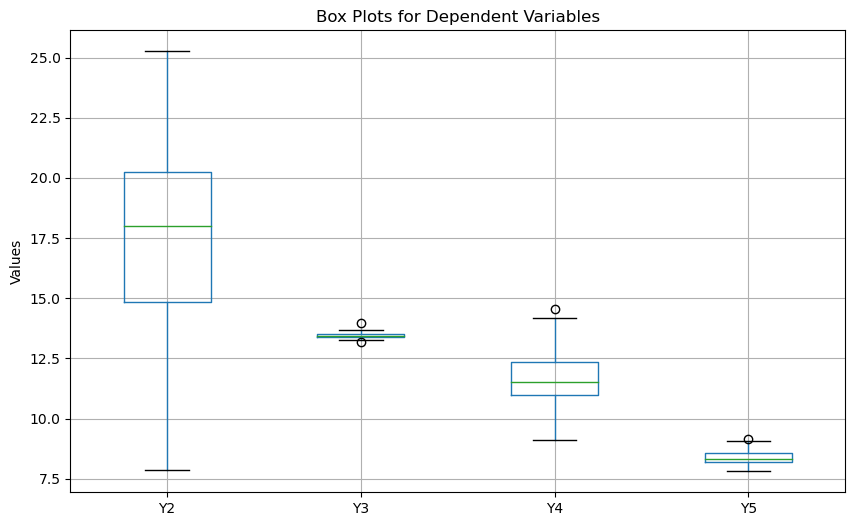

In [264]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['Y2', 'Y3', 'Y4', 'Y5'])
plt.title('Box Plots for Dependent Variables')
plt.ylabel('Values')
plt.show()

The chart above shows the distribution of all the dependent variables except Y1 in all the sample group. We can see that Y2 has the most extensive distribution and Y3 have the smallest.


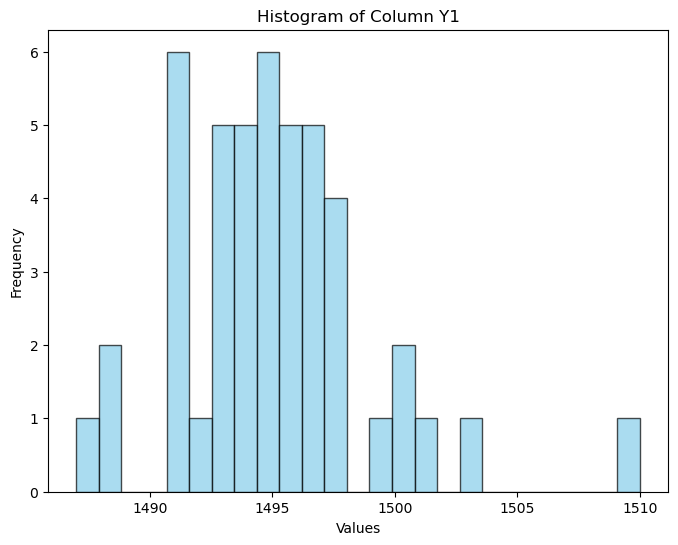

In [265]:
changed_df = df[df['Y1']<2000]
plt.figure(figsize=(8, 6))
plt.hist(changed_df['Y1'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Column Y1')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

We can see in the histogram of column Y1 that we have sixteen different values in this column(including one in 2004 which
is too outre for the histogram).
The values spread from 1487 to 1510, and we have one outre in 2004. Any value has a frequency between 1 to 6.

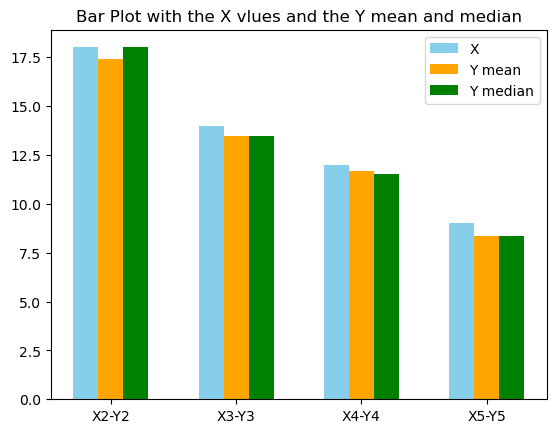

In [266]:
x_labels = ['X2-Y2', 'X3-Y3', 'X4-Y4', 'X5-Y5']
y1_values = [df['X2'].mean(), df['X3'].mean(),df['X4'].mean(),df['X5'].mean()]
y2_values = [df['Y2'].mean(),df['Y3'].mean(),df['Y4'].mean(),df['Y5'].mean(),]
y3_values = [df['Y2'].median(),df['Y3'].median(),df['Y4'].median(),df['Y5'].median(),]
x_positions = np.arange(len(x_labels))
bar_width = 0.2
plt.bar(x_positions - bar_width, y1_values, bar_width, label='X', color='skyblue')
plt.bar(x_positions, y2_values, bar_width, label='Y mean', color='orange')
plt.bar(x_positions + bar_width, y3_values, bar_width, label='Y median', color='green')
plt.title('Bar Plot with the X vlues and the Y mean and median')
plt.xticks(x_positions, x_labels)
plt.legend()
plt.show()

Here we can see the difference between the X values to their responding Y values median and mean.

<h3>part 3</h3>

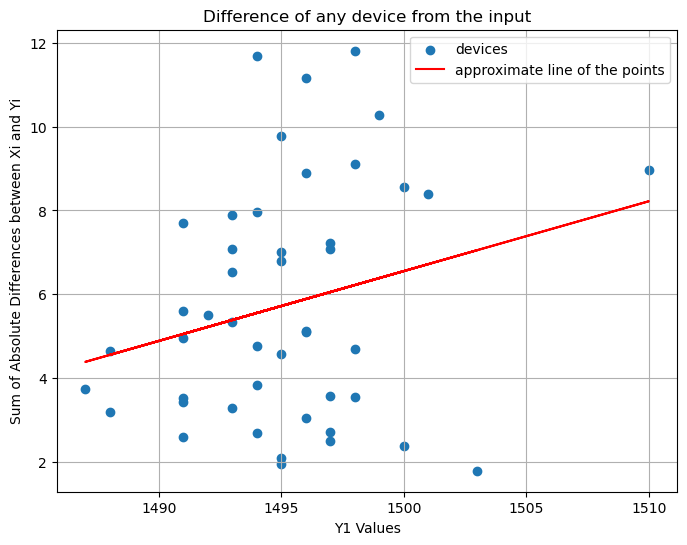

The absulute difference when y1 = 2004:
1    0.7
dtype: float64
correletion between Y1 and the sum of the difference between the Y and X values:
0.24124549126742792


In [267]:
plt.figure(figsize=(8, 6))

plt.xlabel('Y1 Values')
plt.ylabel('Sum of Absolute Differences between Xi and Yi')
plt.title('Difference of any device from the input')
plt.grid(True)
df_abs_diff = pd.DataFrame()
for i in range(2, 6):
    column_name = f'Y{i}-X{i}'
    df_abs_diff[column_name] = abs(changed_df[f'Y{i}'] - changed_df[f'X{i}'])
sum_abs_diff=df_abs_diff['Y2-X2']+df_abs_diff['Y3-X3']+df_abs_diff['Y4-X4']+df_abs_diff['Y5-X5']
plt.scatter(changed_df['Y1'],sum_abs_diff)
y1_sum = {
    '1': np.ones(46),
    'Y1': changed_df['Y1']
}

y1_sum_df = pd.DataFrame(y1_sum)

x, residuals, rank, singular_values = np.linalg.lstsq(y1_sum_df, sum_abs_diff, rcond=None)
b = x[1]*y1_sum['Y1']+x[0]
plt.plot(y1_sum['Y1'],b, color='r')
plt.legend(['devices','approximate line of the points'])
plt.show()
row = df.loc[df['Y1'] == 2004]
diff = (abs(row['Y2']-row['X2'])+abs(row['Y3']-row['X3'])+abs(row['Y4']-row['X4'])+abs(row['Y5']-row['X5']))
print("The absulute difference when y1 = 2004:")
print(diff)
print('correletion between Y1 and the sum of the difference between the Y and X values:')
print(y1_sum['Y1'].corr(sum_abs_diff))

Here we can see the difference (absolute) between the Y values and the X values according to the Y1 values. Again, the 2004 value is not in the chart, but we can see he best matches the X values. 
Also, we can see the red line that is the best line that matches the points (by least squares method). We can learn from it that there in general, Y1 is going up with the difference. But the correlation between Y1 and the sum of differences is low, and we didn't include the 2004 value that has the lowest differens, so we can't find a strong connection between them. 

<h3>part 4</h3>

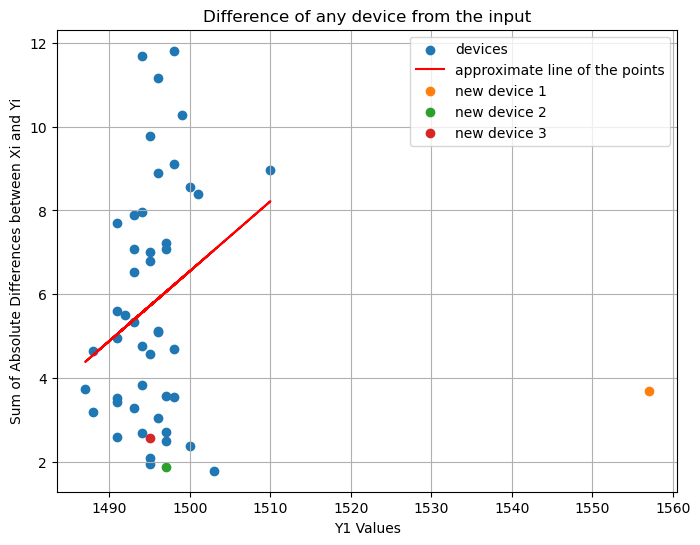

In [268]:
path = './new_devices.csv'
new_df = pd.read_csv(path)
new_diff = pd.DataFrame()
for i in range(2, 6):
    column_name = f'Y{i}-X{i}'
    new_diff[column_name] = abs(new_df[f'Y{i}'] - new_df[f'X{i}'])
sum_new_diff=new_diff['Y2-X2']+new_diff['Y3-X3']+new_diff['Y4-X4']+new_diff['Y5-X5']
plt.figure(figsize=(8, 6))
plt.xlabel('Y1 Values')
plt.ylabel('Sum of Absolute Differences between Xi and Yi')
plt.title('Difference of any device from the input')
plt.grid(True)
plt.scatter(changed_df['Y1'],sum_abs_diff)
plt.plot(y1_sum['Y1'],b, color='r')
for i, row in new_df.iterrows():
    plt.scatter(row['Y1'],sum_new_diff[i])
plt.legend(['devices','approximate line of the points','new device 1', 'new device 2', 'new device 3'])
plt.show()

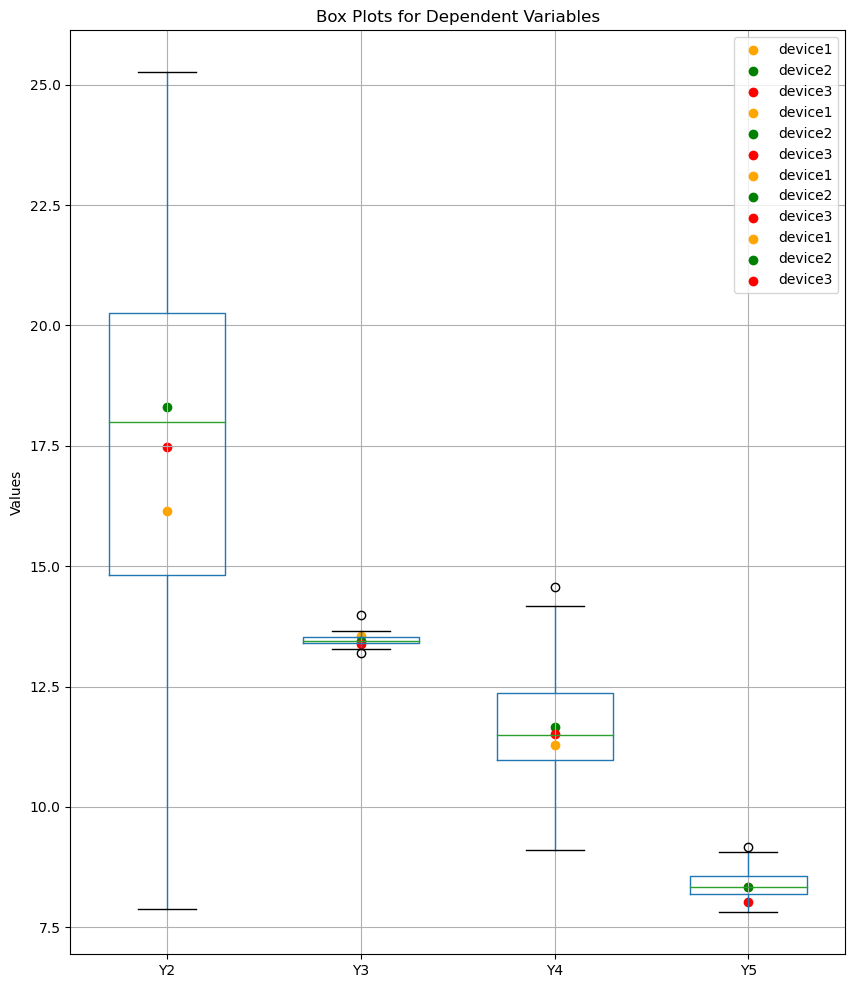

In [272]:
plt.figure(figsize=(10, 12))
df.boxplot(column=['Y2', 'Y3', 'Y4', 'Y5'], positions=[1, 2, 3, 4], widths=0.6)
plt.title('Box Plots for Dependent Variables')
plt.ylabel('Values')

x_positions = [1, 2, 3, 4]
for i, col in enumerate(['Y2', 'Y3', 'Y4', 'Y5']):
    if i == 1:
        plt.scatter(x_positions[i], new_df.iloc[0][col], color='orange', label='device1')
        plt.scatter(x_positions[i], new_df.iloc[1][col], color='g', label='device2')
        plt.scatter(x_positions[i], new_df.iloc[2][col], color='r', label='device3')
    else:
        plt.scatter(x_positions[i], new_df.iloc[0][col], color='orange')
        plt.scatter(x_positions[i], new_df.iloc[1][col], color='g', label='device2')
        plt.scatter(x_positions[i], new_df.iloc[2][col], color='r', label='device3')
plt.legend()
plt.show()

We can see that the Y values of device 2 is the closest to the x values, and device 1 is the most far. But we also can see that in the field of the ratio between Y1 and the others, device 3 is closer to the group than device 2. so the rate is:
1. device 3.
2. device 2.
3. device 1.


<h3>part 5</h3>

I will check if the device's output (the dependent variables) is close enough to the sample group with the same input (the independent variables).
To do that, I will use the least squares method. First I will build a Matrix A 475 that contains all the non-empty lines of the factory test data. Then I create vector b 51 with ones. After that, I will find the x from the equation min{|Ax-b|^2} with the list squares method. After I found the x we can multiply any output of the new device by the x vector and decide if it is close enough to what I want.
  

In [270]:
A = df[['Y1','Y2','Y3','Y4','Y5']]
b = np.ones((47,1))
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

After we have x, we can test the sample group or any new devices, by multiplying any row with x. we expect results as much as possible close to one. So we decide that a deviation of up to 0.01 is acceptable. So we check the difference to 1 in all the results, and then we can see if the device passed the test or not.

In [271]:
res = A.dot(x)
diff1 = abs(res-1)
B = new_df[['Y1','Y2','Y3','Y4','Y5']]
res2 = B.dot(x)
diff2 = abs(res2-1)
failed_sample_group = diff1[diff1[0]> 0.01]
print(failed_sample_group)
failed_new_devices = diff2[diff2[0]> 0.01]
print(failed_new_devices)

           0
5   0.010813
16  0.019071
27  0.011006
39  0.012410
40  0.017496
45  0.015144
Empty DataFrame
Columns: [0]
Index: []


As we can see, devices 5, 16, 27, 39, 40, and 45 from the sample test failed the test, and no one from the new devices.  
The devices failed the test because their output wasn't close enough to most group output.